<a href="https://colab.research.google.com/github/Just1got/Hello_python/blob/main/ML_homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

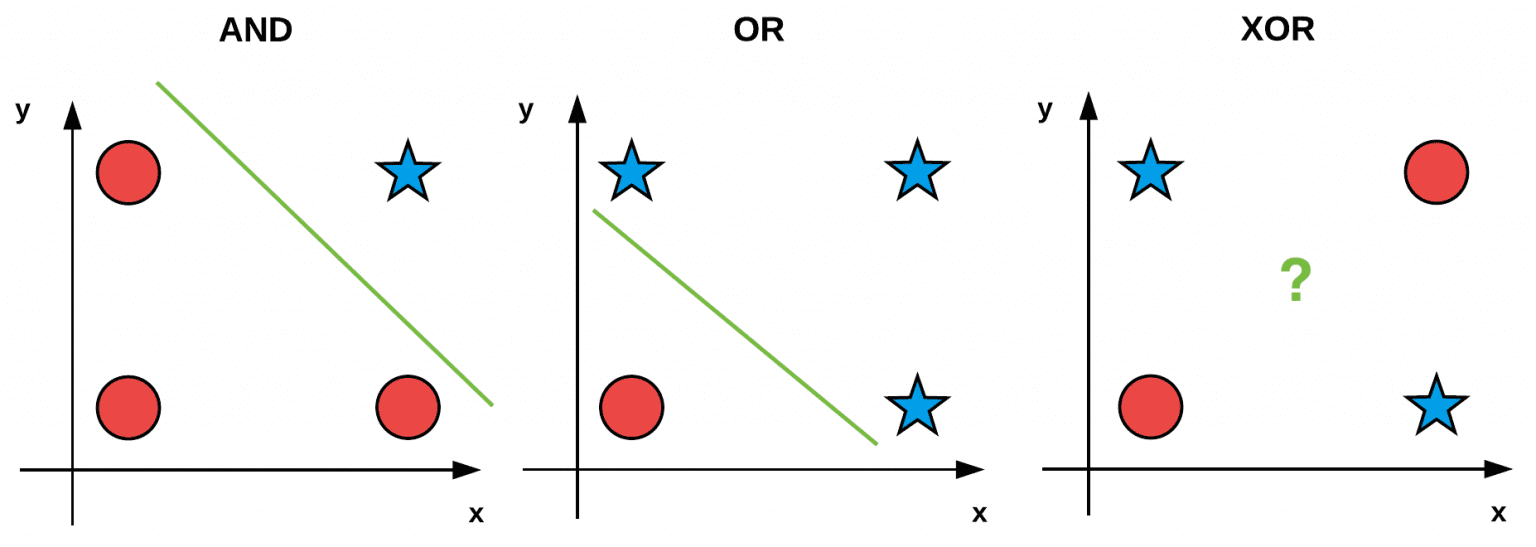

Перцептрон по-прежнему остается очень важным алгоритмом для понимания, поскольку он создает основу для более продвинутых многослойных сетей. Мы поговорим о архитектуре перцептрона и процедуре обучения (называемой правилом дельты), используемой для обучения перцептрона.


Розенблатт (1958) определил перцептрон как систему, которая обучается на маркированных примерах (т.е. обучение с учителем) векторов признаков (или интенсивности необработанных пикселей), отображая эти входы на соответствующие метки классов на выходе.

В своей простейшей форме перцептрон содержит N входных узлов, по одному на каждую запись во входной строке матрицы проектирования, затем только один слой сети с одним узлом в этом слое.

Существуют связи и соответствующие им веса w1, w2, ..., wi от входных xi до единственного выходного узла сети. Этот узел берет взвешенную сумму входов и применяет ступенчатую функцию для определения метки класса на выходе. Перцептрон выдает либо 0, либо 1 - 0 для класса №1 и 1 для класса №2; таким образом, в своей первоначальной форме перцептрон является просто бинарным двухклассовым классификатором.

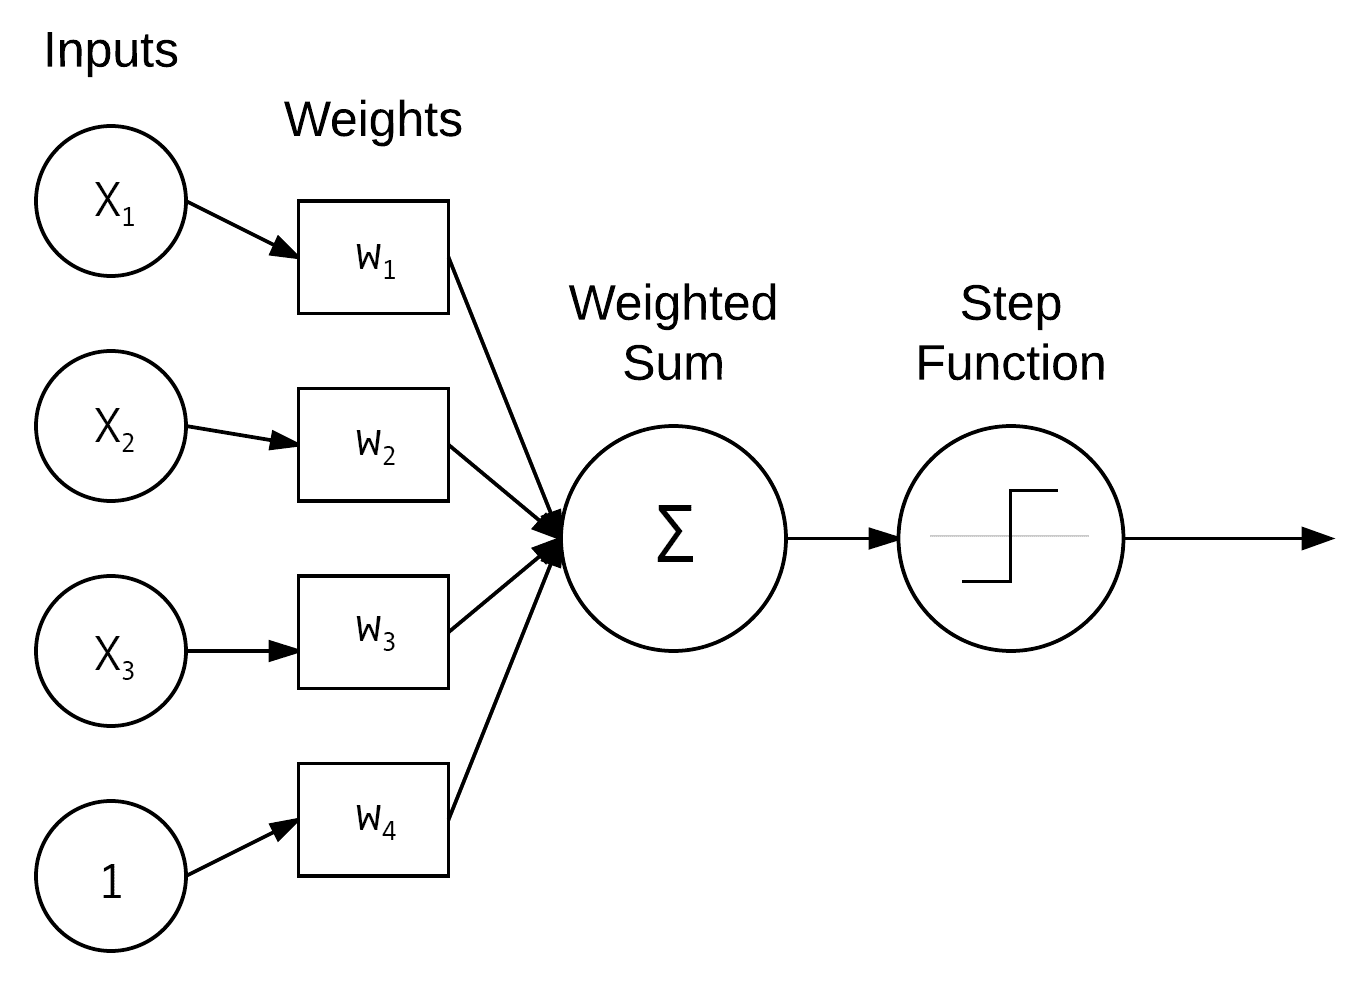

1. Инициализируем наш весовой вектор w небольшими случайными значениями
2. Пока перцептрон не сходится:
(a) Перебираем каждый вектор признаков xj и истинную метку класса di в нашем обучающем множестве D
(b) Берем x и пропускаем его через сеть, вычисляя выходное значение: yj = f(w(t) - xj)
(c) Обновление весов w: wi(t +1) = wi(t) +α(dj -yj)xj,i для всех признаков 0 <= i <= n

Обучение перцептрона - довольно простая операция. Наша цель - получить набор весов w, который точно классифицирует каждый экземпляр из нашего обучающего набора. Чтобы обучить перцептрон, мы итеративно подаем на сеть обучающие данные несколько раз. Каждый раз, когда сеть видит полный набор обучающих данных, мы говорим, что прошла эпоха. Обычно требуется много эпох, пока не будет выучен весовой вектор w, линейно разделяющий два класса данных.

Процесс обучения перцептрона продолжается до тех пор, пока все обучающие выборки не будут классифицированы правильно или пока не будет достигнуто заданное количество эпох. Прекращение обучения гарантировано, если α достаточно мало и обучающие данные линейно разделимы.

Что произойдет, если наши данные не являются линейно разделяемыми или мы сделали плохой выбор α? Будет ли обучение продолжаться бесконечно? В этом случае нет - мы обычно останавливаемся после того, как пройдено определенное количество эпох или если количество ошибочных классификаций не изменилось за большое количество эпох (что указывает на то, что данные не являются линейно разделяемыми).

In [ ]:
# импортировать необходимые пакеты
import numpy as np
class Perceptron:
  def __init__(self, N, alpha=0.2):
    # инициализировать весовую матрицу и сохранить скорость обучения
    self.W = np.random.randn(N + 1) / np.sqrt(N)
    self.alpha = alpha
  def step(self, x):
    # применить пороговую функцию
    return 1 if x > 0 else 0
  def fit(self, X, y, epochs=15):
		# вставить столбец из 1 в качестве последнего элемента в матрицу признаков 
    # - этот маленький трюк позволяет нам рассматривать смещение как обучаемый параметр в матрице весов
    X = np.c_[X, np.ones((X.shape[0]))]
    		# цикл с желаемым количеством эпох
    for epoch in np.arange(0, epochs):
			# перебирайте каждую отдельную точку данных
      for (x, target) in zip(X, y):
				# взять сумму точечных произведений между входными характеристиками
				# и матрицу весов, затем передайте это значение
				# через пороговую функцию для получения прогноза
        p = self.step(np.dot(x, self.W))
				# выполнять обновление веса только в том случае, если наше предсказание
				# не соответствует целевому
        if p != target:
					# определить ошибку
          error = p - target
					# обновить матрицу весов
          self.W += -self.alpha * error * x
  def predict(self, X, addBias=True):
    # убедиться, что наш вход - это матрица
    X = np.atleast_2d(X)
		# проверить, нужно ли добавить колонку смещения
    if addBias:
			# вставить столбец из значений 1 в качестве последней записи в функции
			# matrix (bias)
      X = np.c_[X, np.ones((X.shape[0]))]
		# взять сумму точечных произведений между входными характеристиками
		# и матрицу весов, затем передайте это значение
		# через пороговую функцию для получения прогноза
    return self.step(np.dot(X, self.W))

Строка 4 определяет конструктор нашего класса Perceptron, который принимает один обязательный параметр и второй необязательный:

N: количество столбцов в наших входных векторах признаков. В контексте наших битовых наборов данных мы зададим N равным двум, так как у нас два входа.
alpha: Наша скорость обучения для алгоритма перцептрона. По умолчанию мы установим это значение равным 0,1. Обычный выбор скорости обучения обычно находится в диапазоне α = 0,1, 0,01, 0,001.

Строка 6 заполняет нашу весовую матрицу W случайными значениями, взятыми из "нормального" (гауссовского) распределения с нулевым средним и единичной дисперсией. Весовая матрица будет иметь N+1 записей, по одной для каждого из N входов в векторе признаков, плюс одна для смещения. Мы делим W на квадратный корень из числа входов - обычная техника, используемая для масштабирования нашей весовой матрицы, что приводит к ускорению сходимости. 

Далее определим пороговую функцию..

Эта функция имитирует поведение степенного уравнения - если x положительно, мы возвращаем 1, в противном случае - 0.

Для обучения перцептрона мы определим функцию fit. Метод подгонки требует двух параметров, за которыми следует один необязательный.

Значение X - это наши фактические данные для обучения. Переменная y - это наши целевые метки выходных классов (т.е. то, что должна предсказать наша сеть). Наконец, мы задаем epochs - количество эпох, в течение которых будет обучаться наш перцептрон.

В строке 14 применяется трюк со смещением путем вставки столбца единиц в обучающие данные, что позволяет нам рассматривать смещение как обучаемый параметр непосредственно в матрице весов.

В строке 16 мы запускаем цикл с желаемым числом эпох. Для каждой эпохи мы также перебираем каждую отдельную точку данных x и выводим метку целевого класса (строка 18).

В строке 22 берется точечное произведение между входными характеристиками x и весовой матрицей W, затем выход проходит через пошаговую функцию для получения предсказания перцептрона.

Применяя процедуру обучения, мы выполняем обновление веса только в том случае, если наш прогноз не совпадает с целевым (строка 25). Если это так, мы определяем ошибку (строка 27), вычисляя знак (положительный или отрицательный) с помощью операции разности.

Обновление весовой матрицы происходит в строке 29, где мы делаем шаг к правильной классификации, масштабируя этот шаг на нашу скорость обучения alpha. За несколько эпох наш перцептрон способен изучить закономерности в базовых данных и изменить значения весовой матрицы таким образом, чтобы правильно классифицировать наши входные образцы x.

Последняя функция, которую нам нужно определить, это predict, которая, как следует из названия, используется для предсказания меток классов для заданного набора входных данных.

Наш метод прогнозирования требует набора входных данных X, которые необходимо классифицировать. В строке 34 проверяется, нужно ли добавить столбец смещения.

Получение выходных прогнозов для X аналогично процедуре обучения - просто возьмите точечное произведение между входными признаками X и нашей весовой матрицей W, а затем передайте это значение через нашу пошаговую функцию. Выход пошаговой функции возвращается в вызывающую функцию.

Теперь, когда мы реализовали наш класс перцептронов, давайте попробуем применить его к нашим наборам данных и посмотрим, как работает нейронная сеть.

**Построение набора данных OR**

In [ ]:
# построение набора данных OR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])
# определить перцептрон и обучить его
print("[INFO] training perceptron...")
p = Perceptron(X.shape[1], alpha=0.2)
p.fit(X, y, epochs=20)
# теперь, когда наш перцептрон обучен, мы можем его оценить
print("[INFO] testing perceptron...")
# теперь, когда наша сеть обучена, пройдитесь по точкам данных
for (x, target) in zip(X, y):
	# сделать прогноз по точке данных и отобразить результат
  pred = p.predict(x)
  print("[INFO] data={}, ground-truth={}, pred={}".format(
    x, target[0], pred))

Строки 2 и 3 определяют набор данных OR на основе таблицы.

Строки 6 и 7 обучают наш перцептрон со скоростью обучения α = 0.1 в течение 20 эпох.

Затем мы можем оценить наш перцептрон на данных, чтобы убедиться, что он действительно обучился функции ИЛИ

В строке 11 мы перебираем все точки данных в наборе данных OR. Для каждой из этих точек данных мы пропускаем ее через сеть и получаем предсказание (строка 13).

Наконец, строки 14 и 15 выводят на консоль точку входных данных, метку, полученную в результате проверки, а также нашу предсказанную метку.

Конечно, наша нейронная сеть способна правильно предсказать, что операция OR для x0 = 0 и x1 = 0 равна нулю - все остальные комбинации равны единице.

**Построение набора данных AND**

In [ ]:
# построение набора данных AND
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])
# определить перцептрон и обучить его
print("[INFO] training perceptron...")
p = Perceptron(X.shape[1], alpha=0.1)
p.fit(X, y, epochs=20)
# теперь, когда наш перцептрон обучен, мы можем его оценить
print("[INFO] testing perceptron...")
# теперь, когда наша сеть обучена, пройдитесь по точкам данных
for (x, target) in zip(X, y):
	# сделать прогноз по точке данных и отобразить результат
  pred = p.predict(x)
  print("[INFO] data={}, ground-truth={}, pred={}".format(
    x, target[0], pred))

**Построение набора данных XOR**


In [ ]:
# построение набора данных XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
# определить перцептрон и обучить его
print("[INFO] training perceptron...")
p = Perceptron(X.shape[1], alpha=0.1)
p.fit(X, y, epochs=100)
# теперь, когда наш перцептрон обучен, мы можем его оценить
print("[INFO] testing perceptron...")
# теперь, когда наша сеть обучена, пройдитесь по точкам данных
for (x, target) in zip(X, y):
	# сделать прогноз по точке данных и отобразить результат
  pred = p.predict(x)
  print("[INFO] data={}, ground-truth={}, pred={}".format(
    x, target[0], pred))

-----------

**Дополнительные примеры**

Шаг 1: Импортирование необходимых библиотек

Первым шагом необходимо импортировать библиотеку NumPy, которая позволит работать с массивами и матрицами в Python.

In [ ]:
import numpy as np

Шаг 2: Определение класса для перцептрона class Perceptron

Создадим класс Perceptron, который будет содержать методы для обучения и прогнозирования.
def __init__
Здесь мы определяем конструктор класса, который инициализирует веса W нулями, задает количество эпох (epochs) и скорость обучения (lr).

Шаг 3: Определение функции активации def activation_fn

Для перцептрона можно использовать пороговую функцию активации. Она возвращает 1, если входное значение больше или равно 0, и 0 в противном случае.

Шаг 4: Определение функции прогнозирования def predict

Функция predict() вычисляет взвешенную сумму входных значений и весов и применяет к этой сумме пороговую функцию активации.

Шаг 5: Обучение перцептрона с помощью дельта-правила     def fit

Дельта-правило - это простой алгоритм обучения, который использует разность между предсказанным значением и фактическим значением для корректировки весов.

Здесь мы используем два вложенных цикла для обхода всех обучающих примеров в каждой эпохе. Мы добавляем единицу в начало каждого входного вектора (x) для учета смещения (bias) и делаем предсказание с помощью функции predict(). Затем мы вычисляем ошибку (e) как разность между фактическим значением (d[i]) и предсказанным значением (y). Далее мы корректируем веса, используя формулу Дельта-правило self.W = self.W + self.lr * e * x

Здесь self.lr - это скорость обучения, e - ошибка, x - входной вектор с добавленной единицей в начало. Мы умножаем e на x, чтобы изменить веса, которые отвечают за наиболее значимые признаки.

In [ ]:
class Perceptron:
    def __init__(self, input_size, lr=1, epochs=100):
        self.W = np.zeros(input_size+1)
        self.epochs = epochs
        self.lr = lr
    def activation_fn(self, x):
        return 1 if x >= 0 else 0
    def predict(self, x):
        z = self.W.T.dot(x)
        a = self.activation_fn(z)
        return a
    def fit(self, X, d):
        for epoch in range(self.epochs):
            for i in range(d.shape[0]):
                x = np.insert(X[i], 0, 1)
                y = self.predict(x)
                e = d[i] - y
                self.W = self.W + self.lr * e * x

Шаг 6: Создание обучающих данных и целевых значений

Шаг 7: Создание экземпляра класса перцептрона и обучение

Шаг 8: Проверка точности модели

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
d = np.array([0, 0, 0, 1])
perceptron = Perceptron(input_size=2)
perceptron.fit(X, d)
print("Результаты прогнозирования:")
for i in range(d.shape[0]):
    x = np.insert(X[i], 0, 1)
    print(X[i], ":", perceptron.predict(x))

print("Точность:", np.mean(d == [perceptron.predict(np.insert(X[i], 0, 1)) for i in range(X.shape[0])]))

Шаг 6(2): Создание объекта перцептрона и обучение модели

Теперь мы можем создать объект класса Perceptron и обучить его на обучающих данных. Например, для обучения модели на наборе данных Ирисов Фишера (Fisher's Iris dataset), мы можем использовать следующий код:

In [ ]:
from sklearn.datasets import load_iris

# Загрузите набор iris dataset
iris = load_iris()

# Получение входных и выходных данных
X, y = iris.data, iris.target

# Создайте объект перцептрона и обучите его
model = Perceptron(input_size=4)
model.fit(X, y)

Шаг 7(2): Применение модели для прогнозирования

После того, как модель обучена, мы можем использовать ее для прогнозирования классов новых примеров. Например, для прогнозирования класса цветка Ириса с параметрами (5.1, 3.5, 1.4, 0.2), мы можем использовать следующий код:

In [ ]:
# Сделать прогноз
x_new = np.array([5.1, 3.5, 1.4, 0.2])
y_new = model.predict(np.insert(x_new, 0, 1))

# Выведите прогнозируемый класс
print(y_new)

Здесь мы создаем вектор x_new с параметрами нового примера, добавляем в начало единицу для учета смещения, делаем предсказание с помощью функции predict() и выводим предсказанный класс.

Это основные шаги для реализации перцептрона с помощью Python и обучения его с помощью дельта-правила. И всё же перцептрон - это очень простая модель, которая не всегда может обучаться эффективно и достигать высокой точности на сложных задачах.

# **Задание**

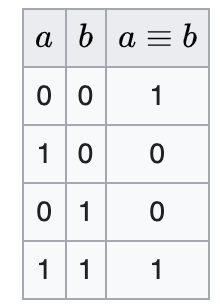

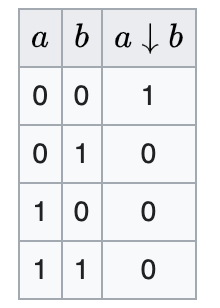

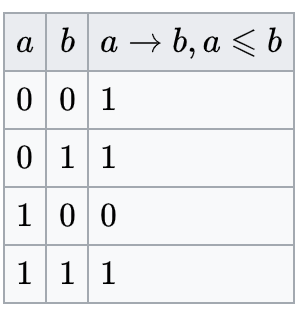

1. Реализуйте класс Perceptron, содержащий методы для инициализации весов, предсказания и обновления весов с помощью дельта-правила. Для булевой функции двух переменных: Эквиваленция, Стре́лка Пи́рса, прямая импликация.

2. Обучите перцептрон на обучающей выборке с помощью дельта-правила. Используйте скорость обучения 0.1 и количество эпох обучения 200.

3. Оцените качество модели. 

4. Сделайте выводы о качестве и эффективности модели.

In [ ]:
code